In [1]:
# Air Line Passengers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('Airline_Passengers_Dataset.csv')

#Parse strings to datetime format

dataset['Month']=pd.to_datetime(dataset['Month'], infer_datetime_format=True)

indexedDataset = dataset.set_index(['Month'])

#from datetime import datetime
#indexedDataset['1949-03']
#indexedDataset['1949-03':'1949-06']
#indexedDataset['1949']
indexedDataset


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


,Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
1949-07-01,0.091937
1949-08-01,0.000000
1949-09-01,-0.084557
1949-10-01,-0.133531


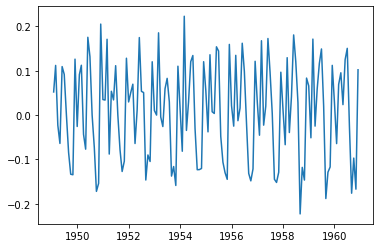

In [8]:
indexedDataset_logscale = np.log(indexedDataset)  # apply log is to get rid of Variance (Seasonality)

#indexedDataset_logscale = indexedDataset

#plt.plot(indexedDataset_logscale)

datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift(1)   # apply diff is to get rid of Mean (Trend)
plt.plot(datasetLogDiffShifting)

datasetLogDiffShifting.dropna(inplace=True)

datasetLogDiffShifting

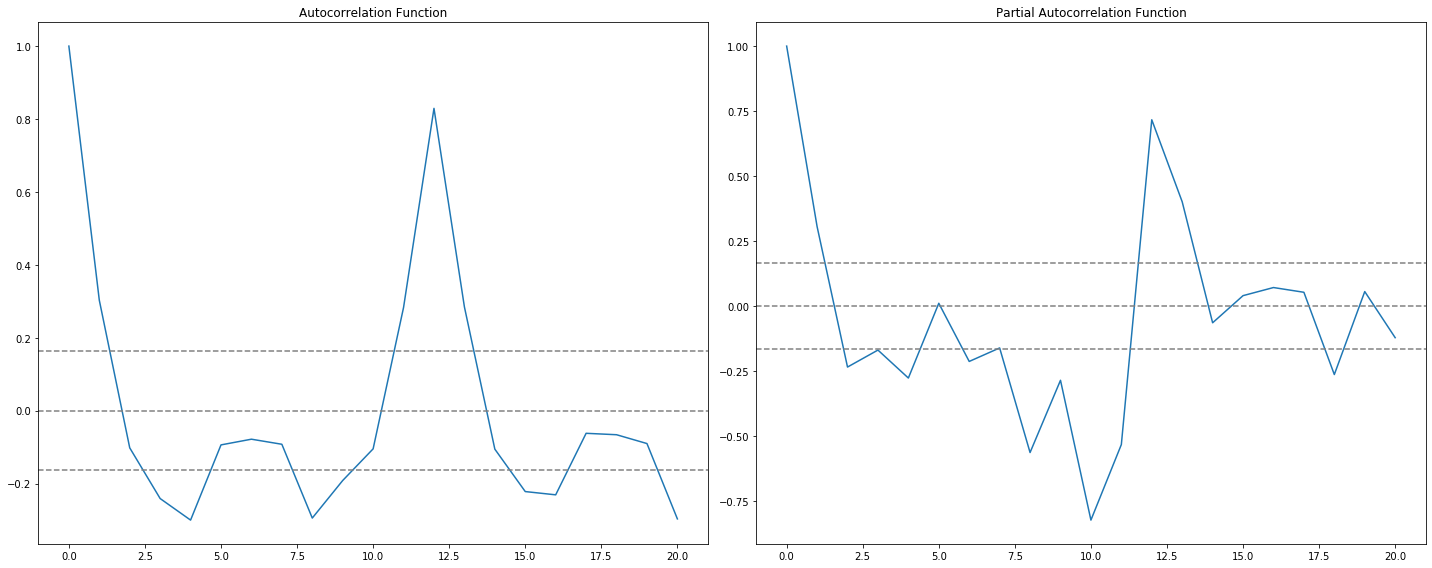

In [17]:
# ACF snd PACF plots:

from statsmodels.tsa.stattools import acf, pacf

plt.figure(figsize=(20,8))

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()




C:\Users\KESHAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\KESHAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model
Month
1949-02-01    0.009600
1949-03-01    0.018167
1949-04-01    0.026435
1949-05-01   -0.015768
1949-06-01   -0.002144
1949-07-01    0.045857
1949-08-01    0.011793
1949-09-01   -0.006866
1949-10-01   -0.010953
1949-11-01   -0.007920
1949-12-01    0.000243
1950-01-01    0.062017
1950-02-01   -0.018865
1950-03-01    0.034979
1950-04-01    0.019765
1950-05-01   -0.020665
1950-06-01   -0.001661
1950-07-01    0.063690
1950-08-01    0.009798
1950-09-01   -0.013750
1950-10-01   -0.008275
1950-11-01   -0.019010
1950-12-01    0.002341
1951-01-01    0.084035
1951-02-01   -0.018166
1951-03-01    0.010935
1951-04-01    0.043512
1951-05-01   -0.041291
1951-06-01    0.036851
1951-07-01    0.007809
                ...   
1958-07-01    0.044391
1958-08-01    0.006346
1958-09-01   -0.005264
1958-10-01   -0.048489
1958-11-01    0.019624
1958-12-01   -0.005254
1959-01-01    0.053999
1959-02-01    0.010160
1959-03-01   -0.014494
1959-04-01    0.058299
1959-05-01   -0.026478
1959-06-01

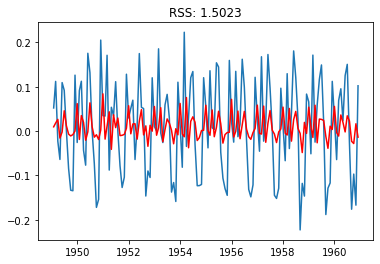

In [31]:
# AR Model

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logscale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting AR model')

print(results_AR.fittedvalues,datasetLogDiffShifting["Passengers"])

In [26]:
from statsmodels.tsa.arima_model import ARIMA

train,test=indexedDataset_logscale[0:130],indexedDataset_logscale[130:]

# we are passing 2,1,2 for p,d,q parameters
model = ARIMA(train,order=(2,1,2))
results_AR = model.fit(transparams=True,disp=0)

# Here we will get the results in log values
results_AR.forecast(steps=14)[0],test

# Converting the results back to exponential form
np.exp(results_AR.forecast(steps=14)[0]),np.exp(test)

C:\Users\KESHAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\KESHAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(array([424.25275473, 454.08683055, 467.62762459, 480.01200131,
        488.57796231, 496.04393845, 502.49077772, 508.51028403,
        514.25513772, 519.88254426, 525.45970266, 531.03432761,
        536.63124413, 542.26613748]),             Passengers
 Month                 
 1959-11-01       362.0
 1959-12-01       405.0
 1960-01-01       417.0
 1960-02-01       391.0
 1960-03-01       419.0
 1960-04-01       461.0
 1960-05-01       472.0
 1960-06-01       535.0
 1960-07-01       622.0
 1960-08-01       606.0
 1960-09-01       508.0
 1960-10-01       461.0
 1960-11-01       390.0
 1960-12-01       432.0)

In [ ]:
#MA MODEL
model = ARIMA(indexedDataset_logscale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting MA model')